<a href="https://colab.research.google.com/github/LuisMig-code/Detector-de-perfis-fakes-do-instagram/blob/main/Detector_de_perfis_fake_no_instagram_PTBR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detector de Perfis Fakes no Instagram**

Criado em 2010 , o Instagram é hoje uma das maiores redes sociais do mundo , ocupando a [6º posição](https://www.maioresemelhores.com/maiores-redes-sociais-do-mundo/) com mais de 1 bilhão de downloads , permitindo aos usuários o compartilhamento de fotos e vídeos. Além disso , se destaca pela possibilidade de criação de "comércios" online para venda de produtos ou serviços. São diversas as funcionalidades do instagram , e não é atoa a sua relevância para o mercado mundial de tecnologia ! 

<img src="https://images.pexels.com/photos/174938/pexels-photo-174938.jpeg?cs=srgb&dl=pexels-energepiccom-174938.jpg&fm=jpg" width='500px' align="center">

## Vamos Pensar!
### Entendendo o Problema:

<img src="https://image.freepik.com/vetores-gratis/equipe-de-gerentes-de-crise-resolvendo-problemas-do-empresario-funcionarios-com-emaranhado-de-desvendamento-de-lampada-ilustracao-vetorial-para-trabalho-em-equipe-solucao-conceito-de-gestao_74855-10162.jpg">


Se você é um usuário do instagram , com certeza já recebeu solicitações ou mensagens de perfis aleatórios , onde normalmente são pessoas divulgando links perigosos. 

Eles são de fato um perigo para os usuários e para isso o Instagram usufrui de um sistema *anti-spam* (ou seja , um sistema que detecte esses perfis fakes e os impedem de enviar solicitações ao usuários) para evitar problemas.


A partir disso , o que faremos hoje será replicar esse mesmo sistema usando *Machine Learning* a fim de fornecer um modelo que possa impedir um usuário comum de ficar recebendo mensagens e solicitações.

## E Nossos Dados?

### Fazendo o import dos dados:

Os dados que usaremos estão disponíveis no site [Kaggle](https://www.kaggle.com/free4ever1/instagram-fake-spammer-genuine-accounts) , lá você pode encontrar descrições completas dos dados.

Estão disponíveis dados tanto para fazermos uso no treinamento do nosso modelo de *Machine Learning* quanto para o teste de qualidade (precisão) dele.

Vamos começar importando as bibliotecas necessárias para nossas análises

In [ ]:
# importando os pacotes necessários

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt


# importando os pacotes necessários para o modelo de Machine Learning
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
link_teste = "https://www.dropbox.com/s/ap90v0bu9td4k4y/test.csv?dl=1"
link_treino = "https://www.dropbox.com/s/uanezjf9y1xb2te/train.csv?dl=1"

In [ ]:
df_teste = pd.read_csv(link_teste)
df_treino = pd.read_csv(link_treino)

### Vamos entender um pouco melhor nossos dados

É interessante que no começo saibamos algumas informações sobre nossos dados , tais como os tipos de dados , saber se tem valores nulos e a correlação dos dados.

Entretanto , é importante que saibamos as variáveis que temos a nossa disposição e o que elas significam, para isso , preparei uma espécie de sumário para obtermos tal informação.

**Dicionário das Features:**


1.   **profile pic** : tem ou não tem foto de perfil? (0 para "não tem" e 1 para "tem")
2.   **nums/lenght username** : proporção do número de caracteres numéricos no nome de usuário em relação ao seu comprimento
3.   **fulname words** : nome completo em numero de palavras
4.   **num/lenght fullname** : relação entre o número de caracteres numéricos no nome completo e seu comprimento
5.   **name==username** : o nome de usuário e igual ao nome completo cadastrado ? (1 para verdadeiro e 0 para falso)
6.   **description length** : número de caracteres da Bio
7.   **external URL** : tem URL externo na Bio ou não
8.   **private** : o perfil é privado ? (1 para sim e 0 para não)
9.   **#posts** : número de publicações
10.  **#followers** : número de seguidores
11.  **#follows** : número de perfis que o usuário segue
12.  **fake** : 0 para "não é fake" e 1 para "é fake". **`variável alvo`**



Em posse estas informações, podemos prosseguir com nossas pré-analises

In [ ]:
# Tipos de dados
df_treino.dtypes

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object

In [ ]:
print("Valores Nulos para nosso Dataset de treino:\n")
df_treino.isnull().sum()

Valores Nulos para nosso Dataset de treino:



profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
print("Valores Nulos para nosso Dataset de teste:\n")
df_teste.isnull().sum()

Valores Nulos para nosso Dataset de teste:



profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
# correlação entre nossos dados
df_treino.corr()[["fake"]]

,fake
profile pic,-0.637315
nums/length username,0.587687
fullname words,-0.298793
nums/length fullname,0.246782
name==username,0.170695
description length,-0.460825
external URL,-0.362809
private,-0.028586
#posts,-0.245355
#followers,-0.093689


De maneira geral, nossos dados são compostos por valores números , não temos nenhuma coluna que tenha valores do tipo "str" (ou seja , texto) , isso é importante na escolha do modelo.

Notamos também que não temos valores nulos em nenhuma das nossas colunas

Por fim , vimos as correlações entre nossos dados , seria mais interessante vê-la em forma de gráfico. Vamos começar nossas análises gráficas?

### Visualisando nossos dados

Vamos começar visualizando nossa correlação a partir de um gráfico de calor

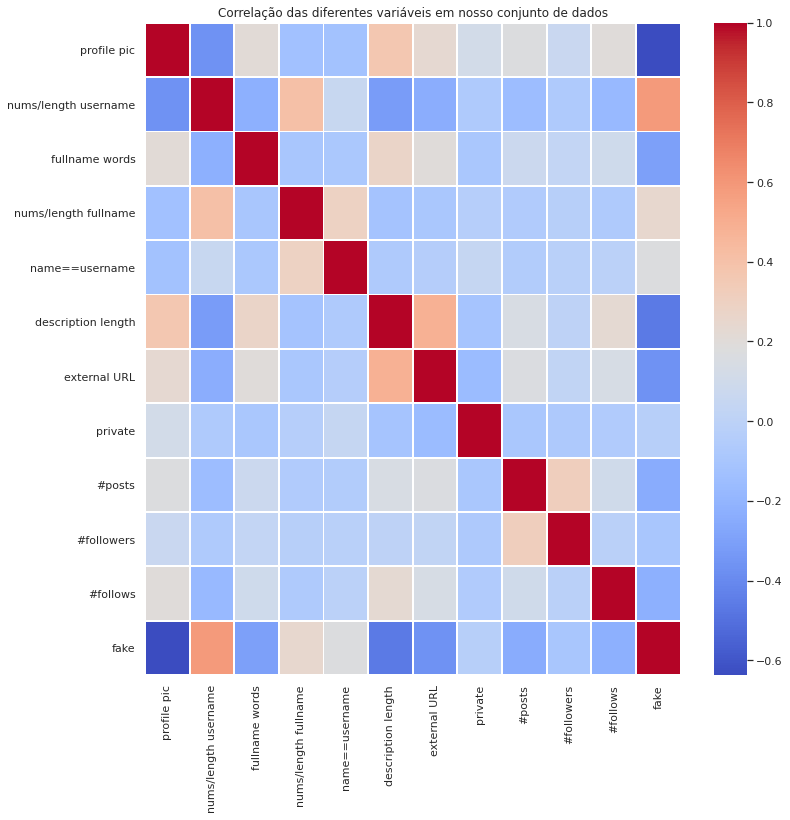

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_treino.corr(), cmap='coolwarm', ax=ax , linewidths=.9)
ax.set_title("Correlação das diferentes variáveis em nosso conjunto de dados")
plt.show()

Ademais , é importante que saibamos a proporção dos dados em nosso *DataFrame*. Vamos plotar um gráfico que mostre a quantidade de fakes e não fake em nossos dados de treino

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


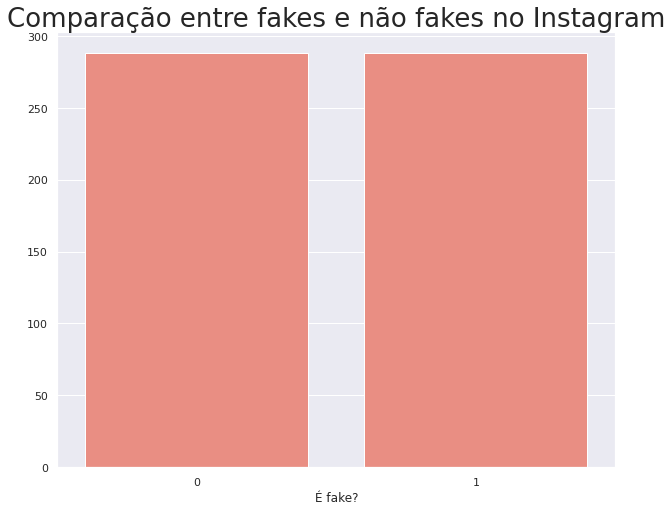

In [ ]:
ax = plt.figure(figsize=(10,8))
ax = sns.countplot(df_treino.fake , color="salmon")
ax.set_title("Comparação entre fakes e não fakes no Instagram" , fontsize=26 , loc="center")
ax.set_xlabel("É fake?")
ax.set_ylabel("")
ax = ax

Temos iguais proporções de dados! Isso é bem interessante para evitar que nosso modelo de *Machine Learning* fique enviesado para algum determinado resultado. 

## Machine Learning
### Vamos começar nossas predições ?

Antes de tudo, gostaria de fazer algumas **ressalvas inicias**: <br><br>

**1)** Teremos 2 conjuntos de dados que já foram previamente disponibilizados: os **dados de treino e os dados de teste**, portanto , não haverá necessidade de fazer divisões prévia dos dados. 

**2)** Usarei 3 algorítimos principais : **Random Forest Classifier** , **Linear SVC** e **KNeigbours Classifier** , e a partir deles decidiremos qual o melhor.

**3)** Não farei nenhuma explicação aprofundada sobre os classificadores , apenas algumas observações sobre eles.

<br>
<br>

<img src="https://i.giphy.com/media/CjmvTCZf2U3p09Cn0h/200.webp">

**Vamos lá?**

### Processando nossos dados:

Anteriormente disso que não faríamos nenhuma divisão de dados de treino e teste pois já fora nos disponibilizados, entretante , ainda há a necessidade de embaralharmos nossos dados , evitando qualquer viés do nosso modelo de predição. Para isso usaremos o atributo `sample()` da biblioteca *pandas*.

In [ ]:
# misturando os dados 
df_treino = df_treino.sample(df_treino.shape[0],random_state=28)

df_teste = df_teste.sample(df_teste.shape[0],random_state=28)

Feito isso , vamos raciocinar mais! 

O que ocorre normalmente em modelos de Machine Learning é a necessidade de *escalar* os dados , não entrarei no mérito de explicar minuciosamente tal funcionalidade , mas acho importante que saibamos se há ou não a necessidade.

Muitos de nossos dados são de `Verdadeiro` ou `Falso` (1 ou 0) e valores pequenos , com casas decimais (0,33 por exemplo). Partindo deste ponto , **juguei desnecessário** fazer qualquer escalamento de dados e permaneci com eles da forma que vieram .

### Dados de treino e teste

A próxima etapa é separar nossa **variável alvo(Y)** e as **features(X)** em diferentes conjuntos de dados , tanto para o treino quanto para o teste , afim de inicar o treinamento do nosso modelo de *Machine Learning*.

In [ ]:
# dados de treino
X_treino = df_treino.drop(["fake"] , axis=1)
y_treino = df_treino["fake"]

# dados de teste
X_teste = df_teste.drop(["fake"] , axis=1)
y_teste = df_teste["fake"]

### Hands On!
#### Vamos colocar a mão na massa e começar de fato a criar nosso modelo

#### Random Forest Classifier

O Random Forest Classifier é o primeiro dos algorítmos que iremos testar.

Muito conhecido por ser robusto e eficiente , ele é também multi-tarefas , podendo servir tanto como Classificador quanto como Regressor.

De forma geral o RFC combina várias arvores de decisões (outro algorítimo de *ML*) e forma , como o próprio nome diz , uma floresta.

Como disse anteriormente , não entrarei em detalhes sobre a lógica do algorítimo , caso queira saber mais clique [aqui](https://massivefile.com/randomforestclassifier/) e leia um artigo completo sobre o tema.

In [ ]:
modelo = RandomForestClassifier(n_estimators=120 , random_state=28  , max_depth = 100 , max_samples = 350)
modelo.fit(X_treino,y_treino)

predicoes = modelo.predict(X_teste)

print("A taxa de acurácia média do modelo com tunning foi de:",accuracy_score(y_teste,predicoes))
print(classification_report(y_teste,predicoes))

A taxa de acurácia média do modelo com tunning foi de: 0.925
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        60
           1       0.93      0.92      0.92        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120



Com o RFC obtivemos uma precisão média do nosso modelo de **0.925** . No fim podemos ver que 92% das vezes so modelo acerta que não é fake e 93% das vezes acerta que era fake. O resultado é bem interessante!

#### Linear SVC

O linear SVC basicamente tenta criar uma equação ,traçando uma linha em um plano , que visa dividir nossos dados nas duas possíveis classificações (0 ou 1), assim como mostrado na imagem:

<img src="https://pythonprogramming.net/static/images/svm/machine-learning-support-vector-machine-linear-svc-example-with-python-and-sklearn-1024x584.png" width=700>

Perceba que os pontos no plano são os dados e que a reta divide esses dados na duas possíveis classificações!

Caso queira saber mais , acesse este [artigo](https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/)

In [ ]:
modelo = LinearSVC(random_state=28)
modelo.fit(X_treino,y_treino)

predicoes = modelo.predict(X_teste)

print("A acurácia média do modelo foi de: {}".format(accuracy_score(y_teste,predicoes) ))
print(classification_report(y_teste,predicoes))

A acurácia média do modelo foi de: 0.6833333333333333
              precision    recall  f1-score   support

           0       0.96      0.38      0.55        60
           1       0.61      0.98      0.76        60

    accuracy                           0.68       120
   macro avg       0.79      0.68      0.65       120
weighted avg       0.79      0.68      0.65       120



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


O que podemos perceber logo de cara é que nosso modelo teve uma média de precisão bem baixa , apenas **0.683** , o que é bem ruim. Mas se você perceber bem , para classificar como "fake"(1) nosso modelo teve uma acurácia de 0.61 , já para "não fake"(0) teve de 0.96.

O que ocorre é que o Linear SVC é bom para formular uma equação onde as features (variáveis X) sejam númericas e não booleanas (True ou False).


O que pudemos perceber é que nosso modelo acabou por ter um viés na classificação

#### KNeighbors Classifier

Esse é o modelo de classificação que eu acho mais interessante , o que ele faz basicamente é um "agrupamento" dos dados classificando-os. Ele não é totalmente um algorítimo de classificação , mas se de *cluster* . No fim o que ele faz é encontrar padrões nas duas possíveis classe (0 ou 1) , ou seja , imaginemos a seguinte situação:



> *Perfis fakes **normalmente** não tem foto;*


> *Um perfil sem foto manda mensagem;*



> *Há uma **grande probabilidade** dele ser um fake visto que perfis fakes se encaixam em grupos onde **NORMALMENTE** não possuem foto*

Caso queira saber mais sobre o KNeighbors Classifier , acesse o seguinte [artigo](https://www.tutorialspoint.com/scikit_learn/scikit_learn_kneighbors_classifier.htm)




In [ ]:
modelo = KNeighborsClassifier(n_neighbors=10 , weights="distance")
modelo.fit(X_treino,y_treino)

predicoes = modelo.predict(X_teste)

print("A acurácia média do modelo foi de :" , accuracy_score(y_teste , predicoes))
print(classification_report(y_teste , predicoes))

A acurácia média do modelo foi de : 0.875
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        60
           1       0.89      0.85      0.87        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



Como já disse anteriormente , o KNeighbors não é propriamente um algorítimo de classifcação por completo , mas consegue exercer bem esse papel

A acurácia média do nosso modelo foi de 0.875 , uma taxa relativamente boa , mas o Random Forest Classifier nos trouxe uma precisão maior.

### **Bônus**: comparação de diferentes resultados:

Provavelmente se lembra que disse acima que não usaríamos dados escalados , certo? de fato não usaremos , mas como seriam nossos resultados caso tivéssemos feito isso? E se usássemos outros algorítimos de classificação? como seriam?


Decidi fazer este teste e disponibilizar um gráfico que mostra os diferentes resultados , tanto para dados escalado quanto não escalados , assim como para mais classificadores:

<img src="https://www.dropbox.com/s/smf150ikyvho55h/Dados%20Escalados%20e%20Dados%20n%C3%A3o%20Escalados%20PTBR.png?dl=1" width=750>

### **Conclusões**

A questão de perfis fakes não é apenas um simples problema de redes sociais no geral , acima disso , trás custo para as empresas e também , em certos casos , pode comprometer a experiência de determinados usuários na plataforma. Evidente , empresas de redes sociais se importam com seus usuários e e para isso tem cada vez mais investido em tecnologias de *Data Science* a fim de melhor a experiência de seus clientes.
<br><br>
Hoje vimos como usar *Machine Learning* para detecção de perfis fakes no instagram , com um resultado bom de detecção , pouco mais de **92,5% de taxa de precisão** , o que eu considero excelente , mas pode melhorar .
<br><br>
**Deixo o desafio à você , o que acha de melhorar esse modelo?**